In [1]:
print("hello world")

[1] "hello world"


In [2]:
# Load pwr package to easily calculate the statistical power
if (!require(pwr)) install.packages('pwr', repos='http://cran.us.r-project.org')
library(pwr)

Loading required package: pwr
Warning message:
"package 'pwr' was built under R version 3.6.3"

In [3]:
# Disable scientific notation (1.05e10)
options(scipen=999)

In [4]:
# Set number of simulations
nSims <- 10^5  # number of simulated experiments

In [81]:
M <- 106  # Mean IQ score in the sample (will be compared with 100 in a one-sample t-test)
n <- 20  # set sample size
SD <- 15  # SD of the simulated data
# With a mean difference of 6, and SD of 15, and a sample size of 26, the test has 50% power)

In [82]:
# Run simulation
p <- numeric(nSims)  # set up empty variable to store all simulated p-values

for (i in 1:nSims) {  # for each simulated experiment
  x <- rnorm(n=n, mean=M, sd=SD)  # Simulate data with specified mean, standard deviation, and sample size
  z <- t.test(x, mu=100)  # perform the t-test against mu (set to value you want to test against)
  p[i] <- z$p.value  # get the p-value and store it
}

In [83]:
# Check power by summing significant p-values and dividing by number of simulations
(sum(p < 0.05) / nSims)  # power

[1] 0.39367

In [84]:
# Calculate power formally by power analysis
# determines M when power > 0. When power = 0, will set  M = 100.
power <- pwr.t.test(
    n=n, d=(M - 100) / SD, sig.level=0.05,
    type="one.sample", alternative="two.sided"
)$power
print(power)

[1] 0.3969938


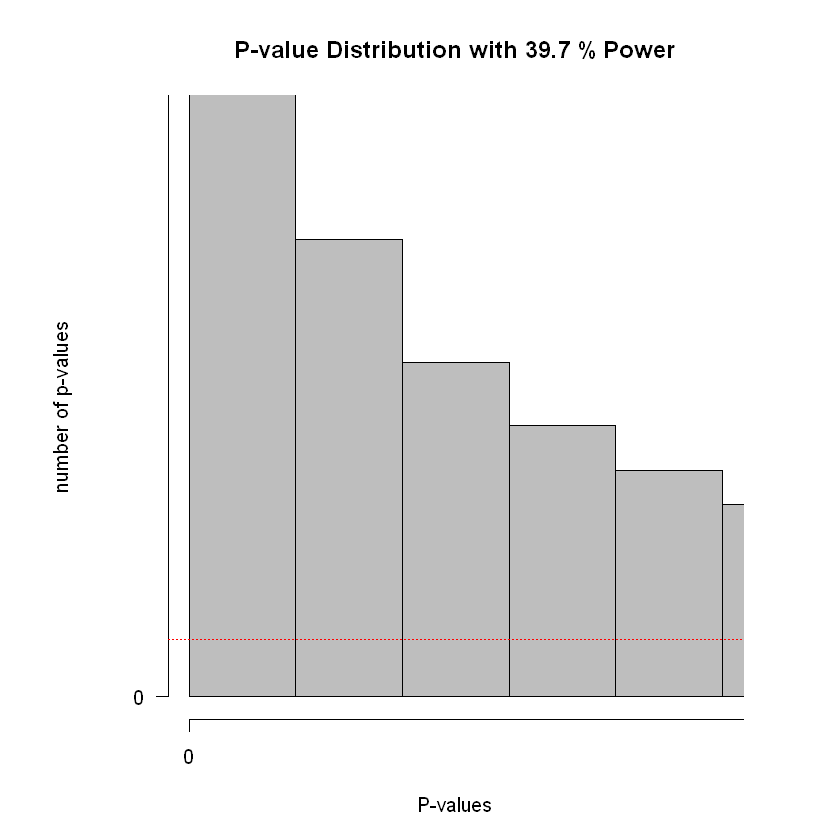

In [85]:
# Plot figure
bars <- 100
op <- par(mar=c(5, 7, 4, 4))  # change white-space around graph
hist(p, breaks=bars, xlab="P-values", ylab="number of p-values\n", axes=FALSE,
     main=paste("P-value Distribution with", round(power*100, digits=1), "% Power"),
     col="grey", xlim=c(0, 0.05), ylim=c(0, 10^4))
axis(side=1, at=seq(0, 1, 0.1), labels=seq(0, 1, 0.1))
axis(side=2, at=seq(0, nSims, nSims/4), labels=seq(0, nSims, nSims/4), las=2)
abline(h=nSims/bars, col="red", lty=3)